# Code along

Hey! Welcome to the notebook. Here's some code you can play with while Chris drones on.

First, imports. If you can run this next cell with no errors, you'll be just fine.

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import RMSprop

import tensorflow as tf

Using TensorFlow backend.


If the `tensorflow` import failed but you have Theano, you might be alright.

### Ex 1

In [2]:
def very_simple_network(input_1, input_2):
    weight_1 = 1
    weight_2 = 1
    bias = 0
    activation = input_1*weight_1 + input_2*weight_2 + bias
    output = 1 if activation > 0 else 0
    return output

# Exercise: try combinations of inputs and see what the output is.
# In particular, try combining boolean inputs.
# What does this network represent?

### Ex 2

In [3]:
def another_simple_network(input_1, input_2):
    weight_1 = -2
    weight_2 = -2
    bias = 3
    activation = input_1*weight_1 + input_2*weight_2 + bias
    output = 1 if activation > 0 else 0
    return output

# Exercise: Try combinations of boolean inputs again.
# What kind of logic gate does this network represent?
# What is the significance of that?

### Ex 3

In [4]:
# elementwise addition:

vector_1 = [1,2,3,4,5]
vector_2 = [1,2,3,4,5]
output_vector = [2,4,6,8,10]

def elementwise_add(v1,v2):
    # Exercise. Write a function that takes vector_1
    # and vector_2 and outputs output_vector.
    return out

### Ex 4

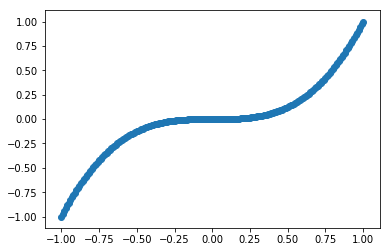

In [5]:
# generate fake dataset
x = np.linspace(-1,1,201)
y3 =  x**3
plt.scatter(x, y3)

In [14]:
cubic_network = Sequential([
    # Exercise. Define a network architecture here.
    # Use Dense(n, input_dim=1) and play with n, then an Activation('tanh') layer
])
cubic_network.compile(loss='mean_squared_error', optimizer='rmsprop')

# Advanced: lookup rmsprop. What is the difference between that and stochastic gradient descent?
# More generally, why might one use an adaptive learning rate?

In [ ]:
cubic_network.fit(x, y3, nb_epoch=100, # try changinge the number of epochs
                  verbose=2)

# With verbose=2, the network will output its loss after every epoch.
# Remember we want to _minimize_ the difference between the output of
# the network and the input data, so a small loss is a good thing.

In [ ]:
y3_prime = cubic_network.predict(x)
plt.scatter(x, y3, alpha=0.1)
plt.plot(x, y3_prime, color='g')

### Ex 5

In [51]:
# Data loading

def read_lines(filename):
    '''Just a convenience function.'''
    lines = open(filename).read().strip().split('.')
    return lines

#lines = read_lines('data/trump_speeches.txt')
# If you prefer Shakespeare, swap out the above for this:
lines = read_lines('data/will_play_truncated.txt')

all_text = ' '.join([' '.join(x.splitlines()) for x in lines])

# Chars is the full list of possible input characters.
# We create index:character and character:index for convenience later.
chars = sorted(list(set(all_text)))
char_indices = {c:i for i, c in enumerate(chars)}
indices_char = {i:c for i, c in enumerate(chars)}

In [52]:
# This is a supervised learning problem. Here we create our training set of (input, output) pairs.

# First define the length of the sequence
seqlen = 40 # 40 characters at a time.

# Advanced: Why do we need a fixed length? Our backend is tensorflow (or Theano),
# which defines a fixed computation graph.
# This has some nice features, like being able to optimize for many computing architectures
# more easily (gpu, cpu, embedded, ...), but it means our graph is static.
# For variable length sequences, we need the graph to be dynamic at run time.
# Fortunately PyTorch released a couple of weeks ago, providing just this (http://pytorch.org/).

# Get all ordered 40 character strings that occur in the text
seqs = [all_text[i:i+seqlen]
        for i in range(len(all_text)-seqlen)]
# and the next character in all those cases
char = [all_text[i+seqlen]
        for i in range(len(all_text)-seqlen)]

In [53]:
# vectorize (encode characters as unit vectors)

# initialize empty lists of vectors with NumPy
X = np.zeros((len(seqs),   # number of training sequences
              seqlen,      # length of each sequence
              len(chars)), # length of each feature vector
             dtype=np.bool)
y = np.zeros((len(seqs), len(chars)), dtype=np.bool)

# fill the right elements of the vectors
for i, seq in enumerate(seqs):
    for t, c in enumerate(seq):
        X[i, t, char_indices[c]] = 1
    y[i, char_indices[char[i]]] = 1

In [54]:
# Training a language model on about a dozen CPU cores took a weekend.
# Instead of starting training yourself, the following pre-trained model files are available.
# - trump_epoch_X.h5        where X in [1, 5, 10, 20, 30, 40, 50, 60]
# - shakespeare_epoch_X.h5  where X in [1, 5, 10, 14]
#   (training for Shakespeare was killed at 14 epochs when Rowan suggested Trump...)
# I suggest loading one model at a time and playing with the output. Start with a low number of epochs.
# The generated text should get more realistic as the number of epochs increases.

model = load_model('models/shakespeare_epoch_1.h5')

# If you swap between models (Trump -> Shakespeare),
# you need to swap the data and rerun the previous few cells too!

In [49]:
# This is just a helper to sample from the output array of characters in each case.
# If we always choose the most likely next character, we get into loops, so instead,
# we sample randomly, with a probability assigned by the output of the network.

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    # thieved from Keras creator @fchollet
    preds = np.asarray([max(x,10**-10) for x in preds]).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [55]:
# Here's the fun part.
# Exercise. Person with the funniest output wins.

# Initialisation
generated = ''

# The seed of the text generation. Feel free to change this,
# but make sure it's at least 40 characters:
sentence = "We're going to Make America Great Again "

# Number of characters to generate following the seed.
# Try a whole essay!
length = 400

# The "temperature" determines how diverse the generated text is.
# It just reweights the output probabilities from the network.
# A lower temperature will be more conservative,
# whereas a higher temperature will be more diverse,
# but probably stop making sense.
temperature = 0.7

# Below here is boilerplate to output the generated text.
sentence = sentence[-40:] # take only the last 40 characters to begin generation.
generated += sentence

print()
sys.stdout.write(generated)
print()
prev_char = ''
for i in range(length):
    x = np.zeros((1, seqlen, len(chars)))
    for t, char in enumerate(sentence):
        x[0, t, char_indices[char]] = 1.

    preds = model.predict(x, verbose=0)[0]
    next_index = sample(preds, temperature)
    next_char = indices_char[next_index]
    
    generated += next_char
    sentence = sentence[1:] + next_char
    
    # This is because I did not preprocess the text optimally,
    # so it doesn't know about full stops. Alas now it sometimes
    # spits out strings of newlines.
    if prev_char == ' ' and next_char == ' ':
        sys.stdout.write('\n')
    else:
        sys.stdout.write(next_char)
    prev_char = next_char
    sys.stdout.flush()


We're going to Make America Great Again 
of kings, That where did do the world know'st thought in the crown, that I lead the busty 
I great houre and detend, then the commander of the son of noble did non, the blord of that I part the hand are 
O, past was for the settle find honour in mare thee and the stand of The king 
When the farewalp the dingst of the kenther and not may mean, and in the counter 
What is you the couds, That wherefo

# Congrats

I hope you learned something. I was blown away the first time I saw how good language generation at the  _character_ level could be. I leave some links for further reading below. Any follow up questions, I can be contacted on twitter [@bitcollider_io](https://twitter.com/bitcollider_io), or drop me a mail at

`<my first name (5 characters)>@bitcollider.io`

(Gotta avoid those spammers scraping GitHub).

Getting started:
- [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
- [Hacker's Guide to Neural Networks](http://karpathy.github.io/neuralnets/)

Further reading on RNNs:
- [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- [Deep Learning, NLP, and Representations](http://colah.github.io/posts/2014-07-NLP-RNNs-Representations/)
- [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [WildML RNN tutorial](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/)
    
Libraries
- [TensorFlow](https://www.tensorflow.org/)
- [Keras](https://keras.io/)
- [PyTorch](http://pytorch.org/)